In [124]:
#1. Load the dataset into python environment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

titanic_df = pd.read_csv("titanic_dataset .csv",index_col = 'PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [125]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [126]:
titanic_df.shape

(891, 11)

In [127]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='PassengerId'>

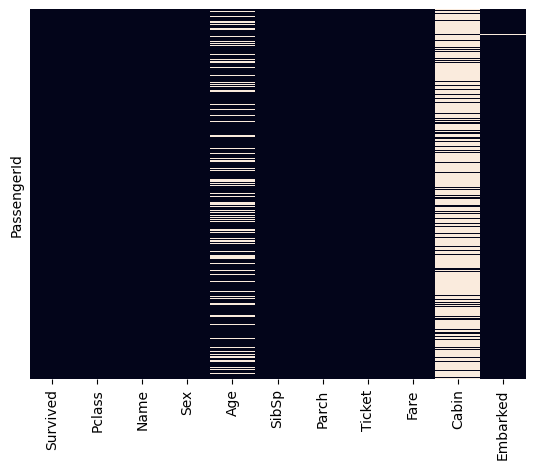

In [129]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False)

In [130]:
#filling the missing values
titanic_df.drop(['Cabin','Name','Ticket','Fare'],axis = 1,inplace = True)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())


In [131]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [132]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

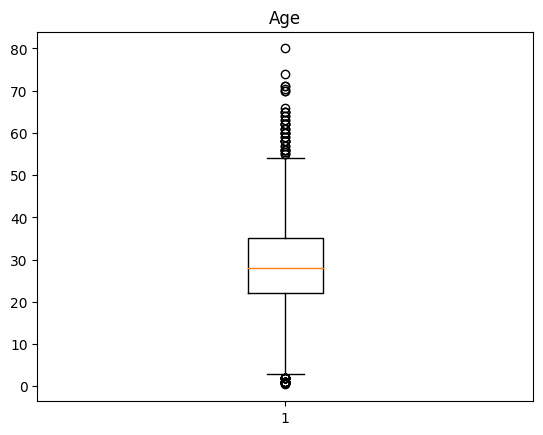

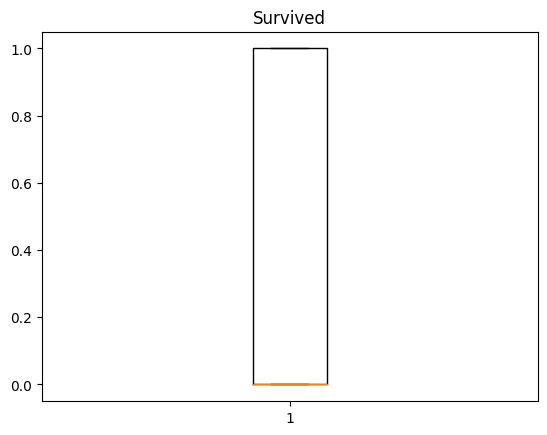

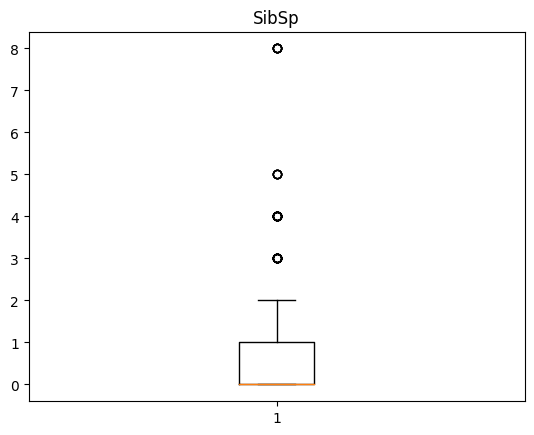

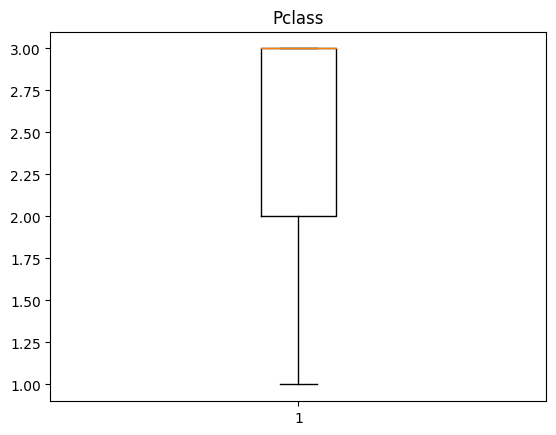

In [133]:
#Checking Outlier

num_columns = ['Age','Survived','SibSp','Pclass']
for i in num_columns:
    plt.figure()
    plt.boxplot(titanic_df[i])
    plt.title(i)
plt.show()

In [134]:
#Finding outliers from Age
Q1 = np.percentile(titanic_df["Age"],25,method="midpoint")
Q2 = np.percentile(titanic_df["Age"],50,method="midpoint")
Q3 = np.percentile(titanic_df["Age"],75,method="midpoint")
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

outlier = []
for x in titanic_df['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

print("Ouliers are", outlier )

Ouliers are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [135]:
indices_age = titanic_df["Age"]<low_lim
ind_age = titanic_df.loc[indices_age].index
ind_age

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [136]:
titanic_df.drop(ind_age,inplace = True)

In [137]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,2
888,1,1,0,19.0,0,0,2
889,0,3,0,28.0,1,2,2


In [141]:
#Training and splitting

x = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [142]:
#SVM
from sklearn.svm import SVC
svm_cls = SVC(kernel='linear')
svm_model = svm_cls.fit(x_train,y_train)
pred_svm = svm_model.predict(x_test)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,pred_svm)

array([[85, 21],
       [20, 48]])

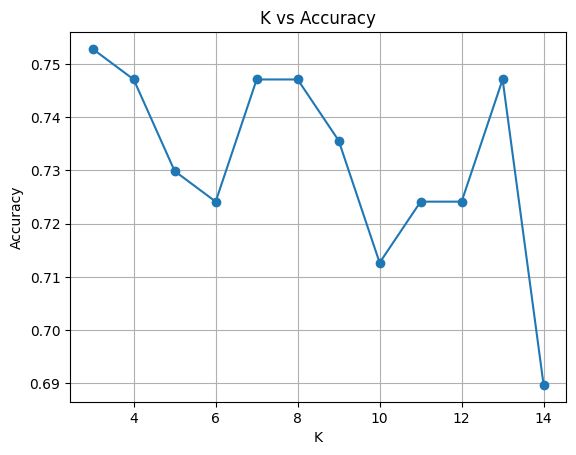

In [147]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    k_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,k_pred)
    metric_k.append(acc)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid()


In [158]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
classifier.fit(x_train,y_train)
k_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,k_pred)
confusion_matrix(y_test,k_pred)
print (accuracy)

0.7471264367816092


In [159]:
#K-fold Cross Validation

from sklearn.model_selection import KFold
k = KFold(10)
k

KFold(n_splits=10, random_state=None, shuffle=False)

In [160]:
#svm

from sklearn.model_selection import cross_val_score
cv_svm = cross_val_score(svm_model,x,y,cv = k)
cv_svm

array([0.81609195, 0.82758621, 0.77011494, 0.86206897, 0.75862069,
       0.8045977 , 0.73563218, 0.73255814, 0.86046512, 0.79069767])

In [166]:
np.mean(cv_svm)

0.7958433573910718

In [161]:
#knn

cv_knn = cross_val_score(classifier,x,y,cv = k)
cv_knn

array([0.70114943, 0.77011494, 0.75862069, 0.70114943, 0.77011494,
       0.74712644, 0.73563218, 0.77906977, 0.8255814 , 0.79069767])

In [168]:
np.mean(cv_knn)

0.7579256883186314

In [162]:
#Stratified K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

In [163]:
#svm

skf_svm = cross_val_score(svm_model,x,y,cv=skf)
skf_svm

array([0.82758621, 0.8045977 , 0.77011494, 0.87356322, 0.79310345,
       0.75862069, 0.77011494, 0.74418605, 0.8255814 , 0.79069767])

In [169]:
np.mean(skf_svm)

0.7958166265704356

In [164]:
#knn

skf_knn = cross_val_score(classifier,x,y,cv=skf)
skf_knn

array([0.73563218, 0.67816092, 0.75862069, 0.75862069, 0.82758621,
       0.72413793, 0.7816092 , 0.77906977, 0.79069767, 0.77906977])

In [165]:
np.mean(skf_knn)

0.761320502539428

In [170]:
print('SVM Model Accuracy : ',accuracy_score(y_test,pred_svm))
print('KNN Model Accuracy : ',accuracy_score(y_test,k_pred))
print('\nAfter KFold Cross Validation ')
print('SVM Model Accuracy : ',np.mean(cv_svm))
print('KNN Model Accuracy : ',np.mean(cv_knn))

print('\nAfter Stratified KFold Cross Validation ')
print('SVM Model Accuracy : ',np.mean(skf_svm))
print('KNN Model Accuracy : ',np.mean(skf_knn))


SVM Model Accuracy :  0.764367816091954
KNN Model Accuracy :  0.7471264367816092

After KFold Cross Validation 
SVM Model Accuracy :  0.7958433573910718
KNN Model Accuracy :  0.7579256883186314

After Stratified KFold Cross Validation 
SVM Model Accuracy :  0.7958166265704356
KNN Model Accuracy :  0.761320502539428
